<a href="https://colab.research.google.com/github/Marcos-CT/Proyecto-Tifon/blob/main/notebooks/Tratamiento_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title 🔧 Setup Proyecto Tifón (clonado + deps + PYTHONPATH, robusto)
import os, sys, subprocess, shutil, pathlib

REPO_URL    = "https://github.com/Marcos-CT/Proyecto-Tifon.git"
PROJECT_DIR = pathlib.Path("/content/Proyecto-Tifon")
SRC_DIR     = PROJECT_DIR / "src"

def run(cmd, **kw):
    print("➜", " ".join(cmd))
    return subprocess.run(cmd, check=False, **kw)

# 1) Clonar o actualizar de forma segura
if PROJECT_DIR.exists():
    if not (PROJECT_DIR / ".git").exists():
        print("⚠️ Existe /content/Proyecto-Tifon pero no es un repo Git. Lo borro y reclono.")
        shutil.rmtree(PROJECT_DIR, ignore_errors=True)
        run(["git", "clone", REPO_URL, str(PROJECT_DIR)])
    else:
        print("Repo ya existe, actualizando…")
        run(["git", "-C", str(PROJECT_DIR), "fetch", "--all", "--prune"])
        run(["git", "-C", str(PROJECT_DIR), "pull", "--ff-only"])
else:
    print("Clonando repo…")
    run(["git", "clone", REPO_URL, str(PROJECT_DIR)])

# 2) Instalar dependencias con el mismo intérprete
req = PROJECT_DIR / "requirements.txt"
if req.exists():
    print("Instalando dependencias…")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "-r", str(req)])
else:
    print("⚠️ No hay requirements.txt; crea uno para fijar dependencias comunes.")

# 3) Añadir src al PYTHONPATH
if SRC_DIR.exists():
    sys.path.append(str(SRC_DIR))
    print("PYTHONPATH ✔", SRC_DIR)
else:
    print("⚠️ No existe src/. Crea src/proyecto_tifon para código reutilizable.")

print("✅ Listo. Carpeta de trabajo:", PROJECT_DIR)


from google.colab import drive
drive.mount('/content/drive', force_remount=True)

DATA_DIR = "/content/drive/MyDrive/TIFON/"  # ajusta si usas Unidad compartida

Clonando repo…
➜ git clone https://github.com/Marcos-CT/Proyecto-Tifon.git /content/Proyecto-Tifon
Instalando dependencias…
PYTHONPATH ✔ /content/Proyecto-Tifon/src
✅ Listo. Carpeta de trabajo: /content/Proyecto-Tifon
Mounted at /content/drive


In [ ]:
#----------------------------Importamos librerías----------------------------
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [ ]:
#----------------------------Montamos drive y cargamos la base de datos----------------------------
drive.mount('/content/drive', force_remount=True)
DATA_DIR = "/content/drive/MyDrive/TIFON/"
df = pd.read_csv(f"{DATA_DIR}base_datos.csv")

Mounted at /content/drive


In [ ]:
#----------------------------Exploramos los datos----------------------------
print(df.head())
print(df.info())
print(df.describe())

     R       Fmax     a              N         SIF          x         y
0  0.0  62.491014   5.0       0.000000  174.730000 -20.000000  0.000000
1  0.0  62.491014   7.0  223713.790360  213.196004 -18.000000  0.000000
2  0.0  62.491014   9.0  344443.709373  243.796017 -16.000000 -0.000765
3  0.0  62.491014  11.0  424105.033144  267.816054 -14.000001 -0.002973
4  0.0  62.491014  13.0  483635.120072  299.968108 -12.000007 -0.007716
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       9999 non-null   float64
 1   Fmax    9999 non-null   float64
 2   a       9999 non-null   float64
 3   N       9999 non-null   float64
 4   SIF     9999 non-null   float64
 5   x       9999 non-null   float64
 6   y       9999 non-null   float64
dtypes: float64(7)
memory usage: 546.9 KB
None
                 R         Fmax            a             N          SIF  \
count  

In [ ]:
#----------------------------Limpiamos los datos----------------------------

# Buscamos NAs

na_counts = df.isna().sum()
print(na_counts)

# Búsqueda de Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers = ((df < (lower_bound)) | (df > (upper_bound))).any(axis=1)
print(f"Número de outliers: {outliers.sum()}")

R       0
Fmax    0
a       0
N       0
SIF     0
x       0
y       0
dtype: int64
Número de outliers: 3379


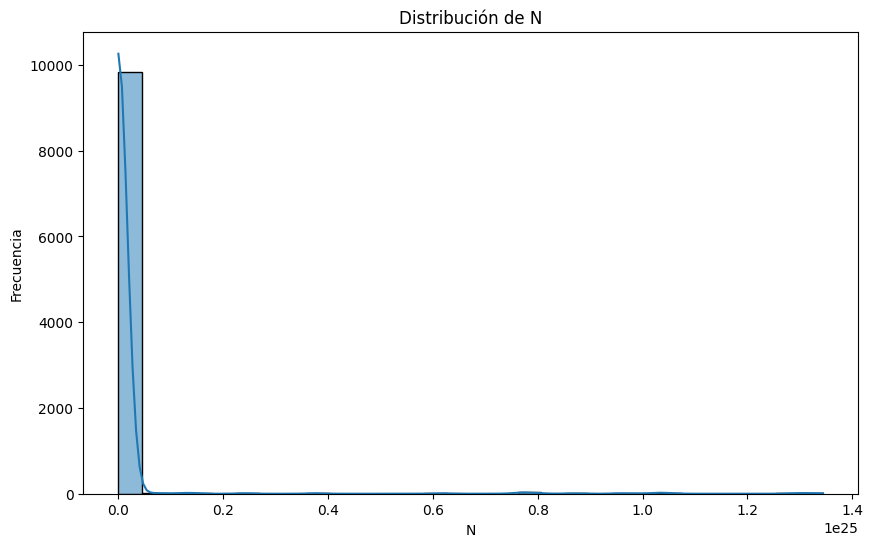

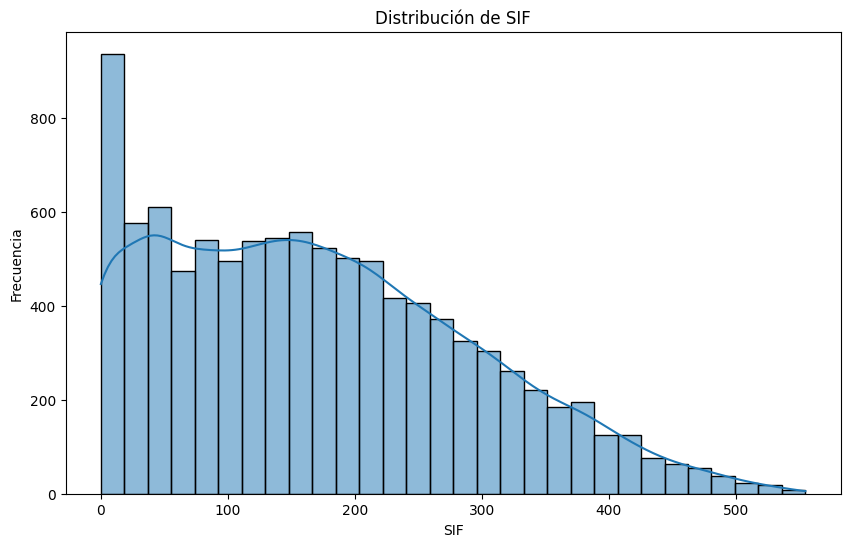

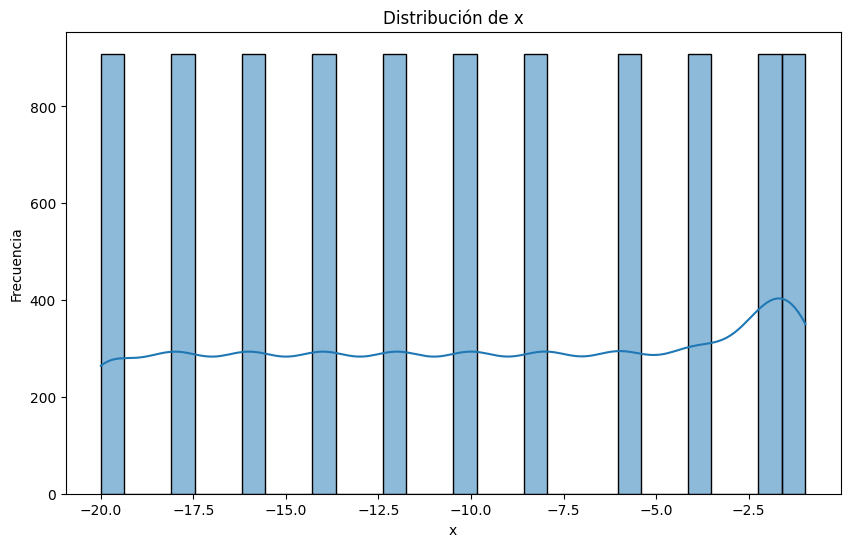

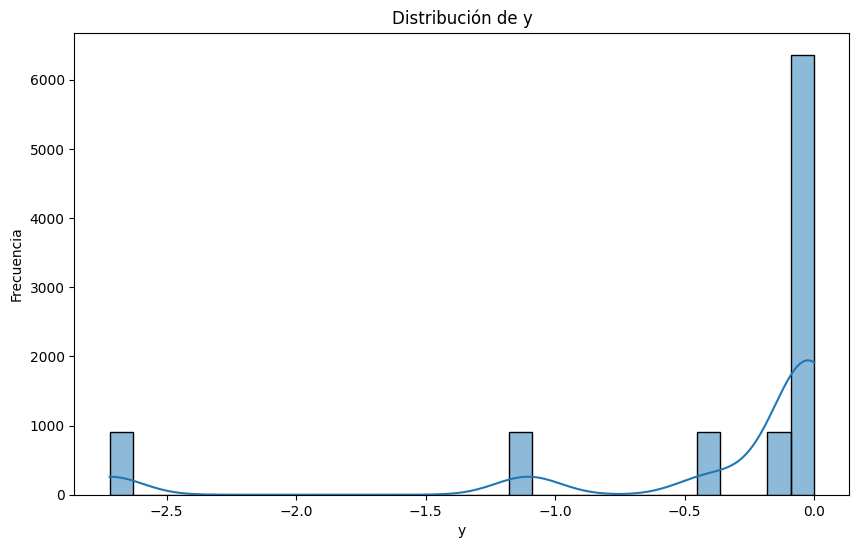

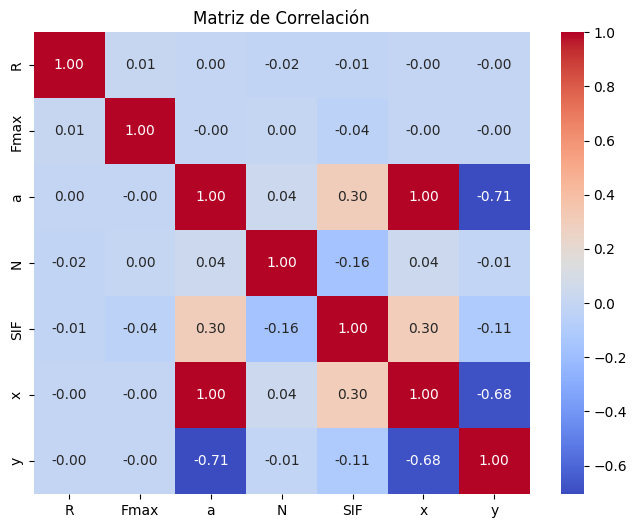

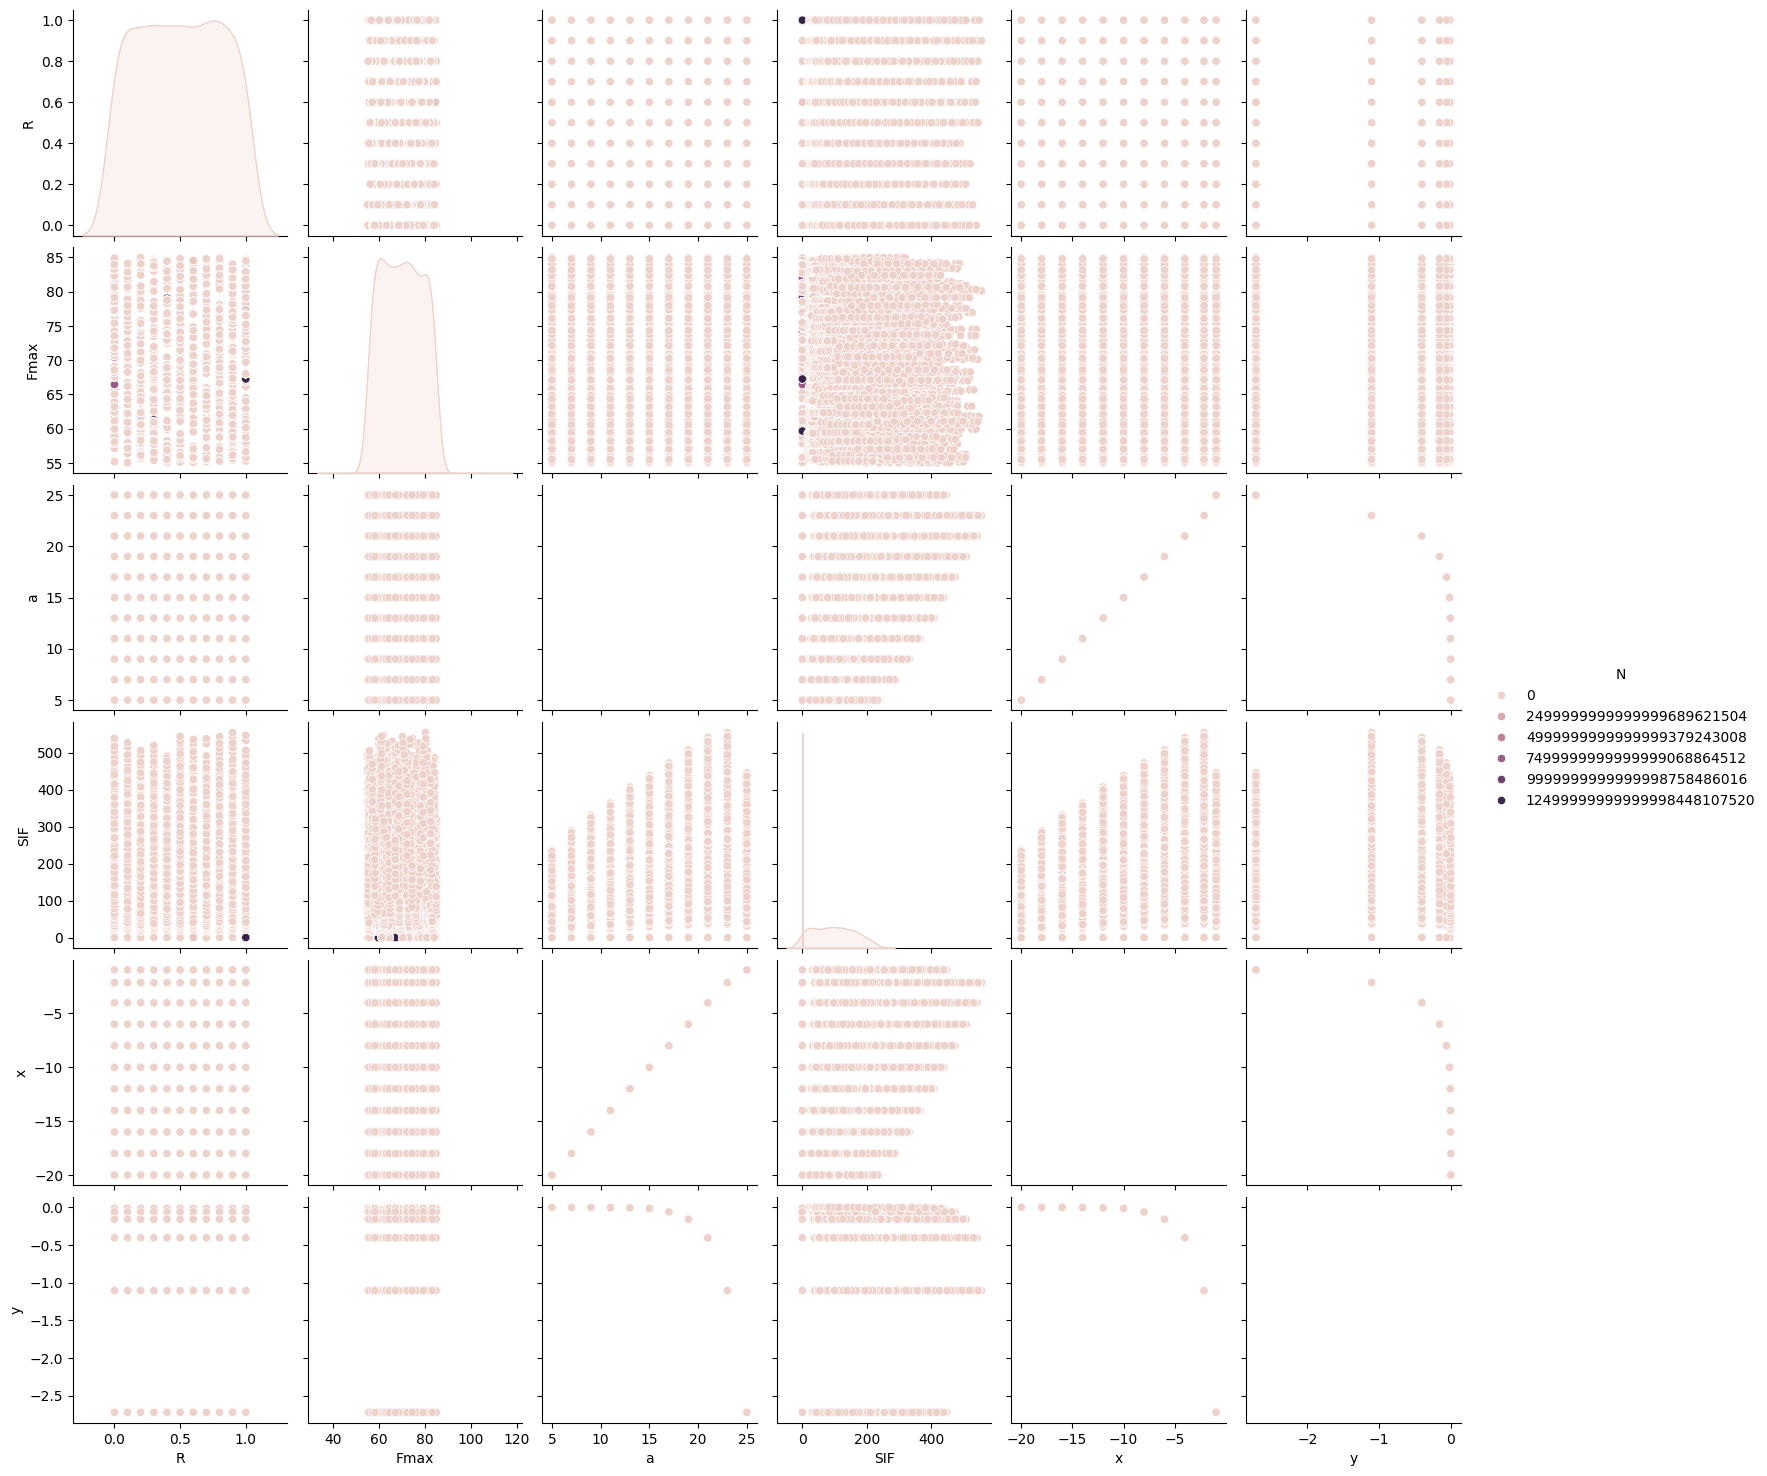

In [ ]:
#----------------------------Análisis exploratorio de variables----------------------------

# Histograma de las variables objetivo

plt.figure(figsize=(10, 6))
sns.histplot(df['N'], bins=30, kde=True)
plt.title('Distribución de N')
plt.xlabel('N')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['SIF'], bins=30, kde=True)
plt.title('Distribución de SIF')
plt.xlabel('SIF')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['x'], bins=30, kde=True)
plt.title('Distribución de x')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['y'], bins=30, kde=True)
plt.title('Distribución de y')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.show()

# Matriz de correlación

plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Pairplot

sns.pairplot(df, hue='N')
plt.show()

In [ ]:
PROJECT_DIR = Path("/content/Proyecto-Tifon")
DATA_DIR = PROJECT_DIR / "data"
DATA_DIR.mkdir(exist_ok=True)

output_path = DATA_DIR / "processed_data.parquet"
print(f"Guardando DataFrame procesado en: {output_path}")
df.to_parquet(output_path, index=False)
print("DataFrame guardado exitosamente.")


Guardando DataFrame procesado en: /content/Proyecto-Tifon/data/processed_data.parquet
DataFrame guardado exitosamente.
